### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

### Importing Data

In [2]:
dataset = pd.read_csv("sbitrain.csv", index_col='Date', parse_dates=True)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,312.450012,315.000000,310.700012,314.000000,295.929230,6138488.0
2015-01-02,314.350006,318.299988,314.350006,315.250000,297.107269,9935094.0
2015-01-05,316.250000,316.799988,312.100006,312.750000,294.751160,9136716.0
2015-01-06,310.000000,311.100006,298.700012,299.899994,282.640686,15329257.0
2015-01-07,300.000000,302.549988,295.149994,300.149994,282.876282,15046745.0


### Exploring Data

In [3]:
dataset.shape

(1230, 6)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1230 entries, 2015-01-01 to 2019-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1229 non-null   float64
 1   High       1229 non-null   float64
 2   Low        1229 non-null   float64
 3   Close      1229 non-null   float64
 4   Adj Close  1229 non-null   float64
 5   Volume     1229 non-null   float64
dtypes: float64(6)
memory usage: 67.3 KB


In [5]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1.229000e+03
mean,271.604556,274.984947,267.614198,271.054231,262.267839,2.063403e+07
std,40.402171,40.768096,39.984439,40.374621,40.230578,1.484057e+07
min,155.000000,157.649994,148.250000,151.800003,144.869904,2.095795e+06
25%,251.800003,255.000000,248.350006,251.149994,242.976791,1.252341e+07
50%,273.000000,276.350006,269.500000,272.950012,264.200562,1.681902e+07
75%,295.899994,299.950012,291.899994,295.100006,286.680573,2.371668e+07
max,371.950012,373.799988,366.200012,372.399994,363.323181,2.626771e+08


In [47]:
dataset.isna().any()

Open                  True
High                  True
Low                   True
Close                 True
Adj Close             True
Volume                True
Close: 30 day mean    True
dtype: bool

In [52]:
dataset = dataset.dropna()

In [54]:
dataset.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Adj Close             False
Volume                False
Close: 30 day mean    False
dtype: bool

In [55]:
dataset.duplicated().sum()

0

In [56]:
dataset.dtypes

Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                float64
Close: 30 day mean    float64
dtype: object

### Handling Outliers

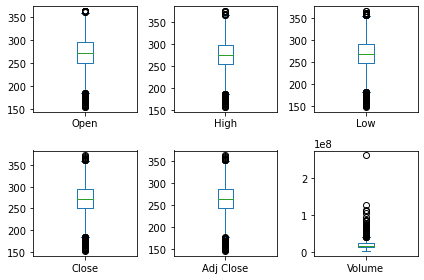

In [57]:
plt.subplot(2,3,1)
dataset['Open'].plot(kind='box')

plt.subplot(2,3,2)
dataset['High'].plot(kind='box')

plt.subplot(2,3,3)
dataset['Low'].plot(kind='box')

plt.subplot(2,3,4)
dataset['Close'].plot(kind='box')

plt.subplot(2,3,5)
dataset['Adj Close'].plot(kind='box')

plt.subplot(2,3,6)
dataset['Volume'].plot(kind='box')
plt.tight_layout()

### Handling Outliers in Volume

In [58]:
def find_outliers_limit(col_name):
    Q1, Q3 = dataset[col_name].quantile([0.25,0.75])
    IQR = Q3-Q1
    low = Q1-(1.5*IQR)
    high = Q3+(1.5*IQR)
    return (high,low)
high_open, low_open = find_outliers_limit('Open')
print('Open: ','Upper_limit: ', high_open)
dataset.loc[dataset['Open']>high_open, 'Open']=high_open

Open:  Upper_limit:  360.36251425


C:\Users\hp\AppData\Local\Temp\ipykernel_10500\1781939311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[dataset['Open']>high_open, 'Open']=high_open


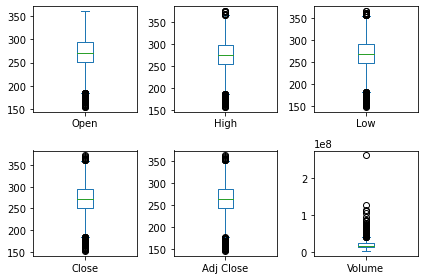

In [59]:
plt.subplot(2,3,1)
dataset['Open'].plot(kind='box')

plt.subplot(2,3,2)
dataset['High'].plot(kind='box')

plt.subplot(2,3,3)
dataset['Low'].plot(kind='box')

plt.subplot(2,3,4)
dataset['Close'].plot(kind='box')

plt.subplot(2,3,5)
dataset['Adj Close'].plot(kind='box')

plt.subplot(2,3,6)
dataset['Volume'].plot(kind='box')
plt.tight_layout()

### Data Visualisation


<AxesSubplot:xlabel='Date'>

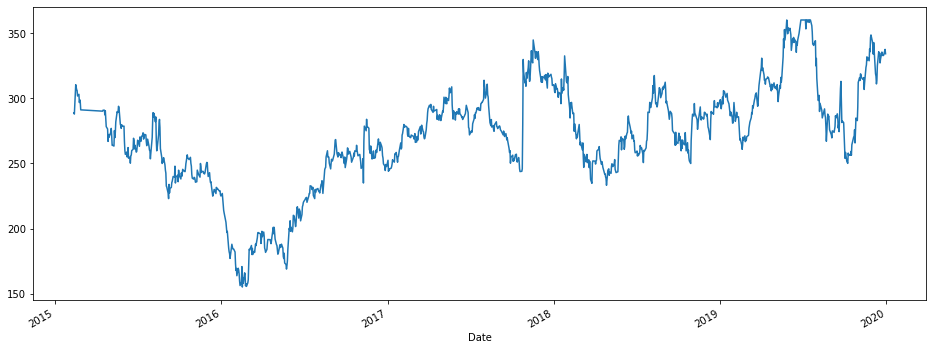

In [60]:
dataset['Open'].plot(figsize=(16,6))

In [61]:
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume,Close: 30 day mean
Date,,,,,,,
2015-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-23,300.785714,305.199999,294.085711,300.692858,283.387905,2.461957e+07,307.208334
2015-02-24,301.928571,306.628571,296.057142,302.400003,284.996800,2.377522e+07,307.049762
2015-02-25,303.500000,305.585711,297.435713,300.771428,283.461953,1.553309e+07,306.869762


<AxesSubplot:xlabel='Date'>

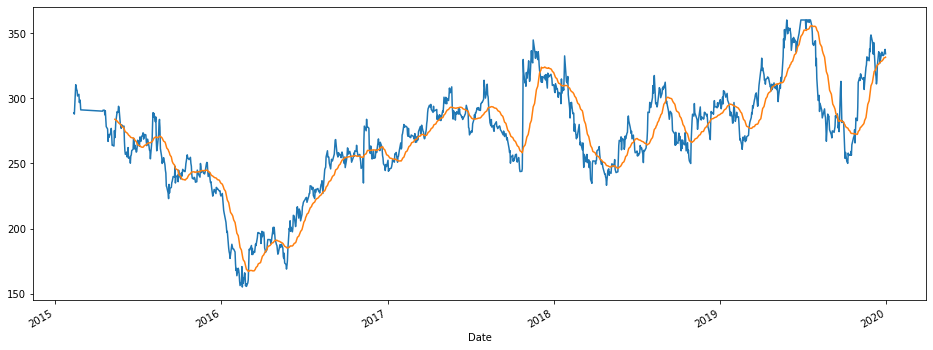

In [62]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

C:\Users\hp\AppData\Local\Temp\ipykernel_10500\3838539435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Close: 30 day mean']=dataset['Close'].rolling(window=30).mean()


<AxesSubplot:xlabel='Date'>

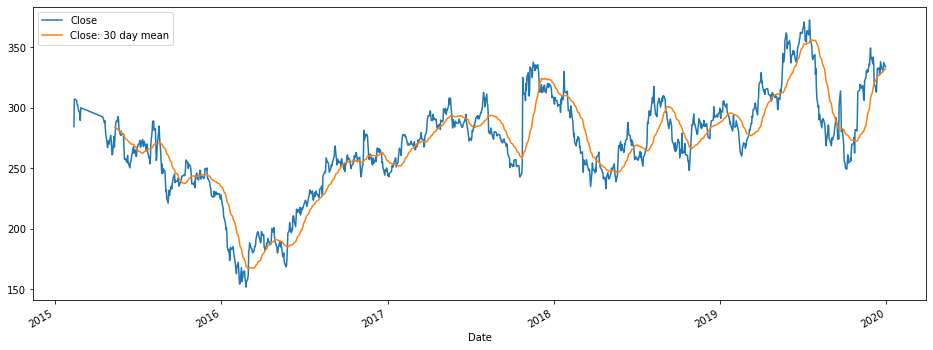

In [63]:
dataset['Close: 30 day mean']=dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 day mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

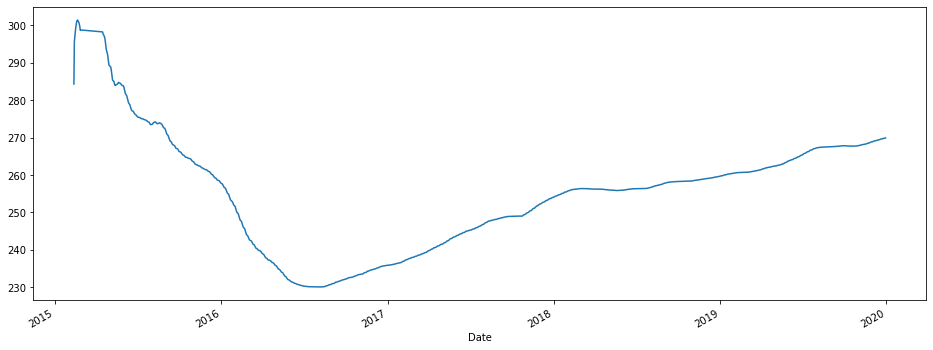

In [64]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [65]:
training_set = pd.DataFrame(dataset['Open'])
training_set

,Open
Date,
2015-02-12,288.899994
2015-02-13,288.000000
2015-02-16,310.600006
2015-02-18,306.799988
2015-02-19,306.100006
...,...
2019-12-24,333.200012
2019-12-26,333.000000
2019-12-27,333.399994


Modelling

In [66]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [68]:
X_train = []
y_train = []
for i in range(60,1171):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0]),
X_train, y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [70]:
regressor = Sequential()

In [71]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))


In [72]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
35/35 [==============================] - 7s 47ms/step - loss: 0.0471
Epoch 2/100
35/35 [==============================] - 2s 49ms/step - loss: 0.0128
Epoch 3/100
35/35 [==============================] - 2s 49ms/step - loss: 0.0133
Epoch 4/100
35/35 [==============================] - 2s 47ms/step - loss: 0.0127
Epoch 5/100
35/35 [==============================] - 2s 50ms/step - loss: 0.0099
Epoch 6/100
35/35 [==============================] - 2s 66ms/step - loss: 0.0092
Epoch 7/100
35/35 [==============================] - 2s 66ms/step - loss: 0.0087
Epoch 8/100
35/35 [==============================] - 2s 66ms/step - loss: 0.0077
Epoch 9/100
35/35 [==============================] - 2s 66ms/step - loss: 0.0081
Epoch 10/100
35/35 [==============================] - 2s 66ms/step - loss: 0.0075
Epoch 11/100
35/35 [==============================] - 2s 66ms/step - loss: 0.0074
Epoch 12/100
35/35 [==============================] - 2s 66ms/step - loss: 0.0064
Epoch 13/100
35/35 [=====

In [73]:
test = pd.read_csv('sbitest.csv', index_col = 'Date', parse_dates = True)

In [74]:
real = test.iloc[:,1:2].values


In [75]:
test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,334.700012,335.950012,332.149994,334.450012,326.298187,17379320
2020-01-02,334.500000,339.850006,333.350006,339.299988,331.029938,20324236
2020-01-03,337.950012,337.950012,332.000000,333.700012,325.566467,21853208
2020-01-06,331.700012,331.700012,317.700012,319.000000,311.224731,35645325
2020-01-07,324.450012,327.000000,315.399994,318.399994,310.639374,50966826


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 765 entries, 2020-01-01 to 2023-01-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       765 non-null    float64
 1   High       765 non-null    float64
 2   Low        765 non-null    float64
 3   Close      765 non-null    float64
 4   Adj Close  765 non-null    float64
 5   Volume     765 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.8 KB


In [77]:
test.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [78]:
test_set = test['Open']
test_set = pd.DataFrame(test_set)

In [79]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 765 entries, 2020-01-01 to 2023-01-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    765 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


In [80]:
dataset_total = pd.concat((dataset['Open'], test['Open']), axis=0)

inputs = dataset_total[len(dataset_total)-len(test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 765):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


23/23 [==============================] - 2s 16ms/step


In [81]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       705 non-null    float32
dtypes: float32(1)
memory usage: 2.9 KB


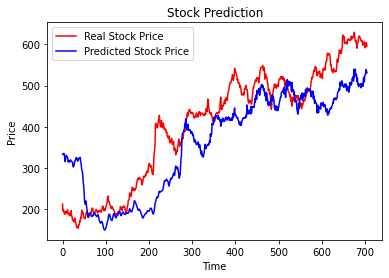

In [86]:
real = real[60:, :]
plt.plot(real, color='red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()